# Data Visualization  for House Sales in King County, USA

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# data : https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [75]:
# Continuing with sales data 
data = pd.read_csv('./kc_house_data.csv',header=0)[:1000]

In [76]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [77]:
data['date']=pd.to_datetime(data['date'].astype(str), format='%Y/%m/%d')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7437100570,2014-08-21,291000.0,4,2.50,1860,6325,2.0,0,0,...,7,1860,0,1991,0,98038,47.3492,-122.030,1860,6449
996,8856004730,2014-09-17,199950.0,2,2.75,1590,20917,1.5,0,0,...,5,1590,0,1920,0,98001,47.2786,-122.250,1310,6000
997,3856902996,2014-08-04,553500.0,2,1.00,850,2340,1.0,0,0,...,7,850,0,1922,0,98105,47.6707,-122.328,1300,3000
998,1442800370,2015-04-15,189950.0,2,1.00,1030,4188,1.0,0,0,...,8,1030,0,1981,0,98038,47.3738,-122.057,1450,3376


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1000 non-null   int64         
 1   date           1000 non-null   datetime64[ns]
 2   price          1000 non-null   float64       
 3   bedrooms       1000 non-null   int64         
 4   bathrooms      1000 non-null   float64       
 5   sqft_living    1000 non-null   int64         
 6   sqft_lot       1000 non-null   int64         
 7   floors         1000 non-null   float64       
 8   waterfront     1000 non-null   int64         
 9   view           1000 non-null   int64         
 10  condition      1000 non-null   int64         
 11  grade          1000 non-null   int64         
 12  sqft_above     1000 non-null   int64         
 13  sqft_basement  1000 non-null   int64         
 14  yr_built       1000 non-null   int64         
 15  yr_renovated   1000 no

In [79]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h1 style='color:blue;'>line plot </h1>

<AxesSubplot:title={'center':'Prices by Date'}, xlabel='date', ylabel='price'>

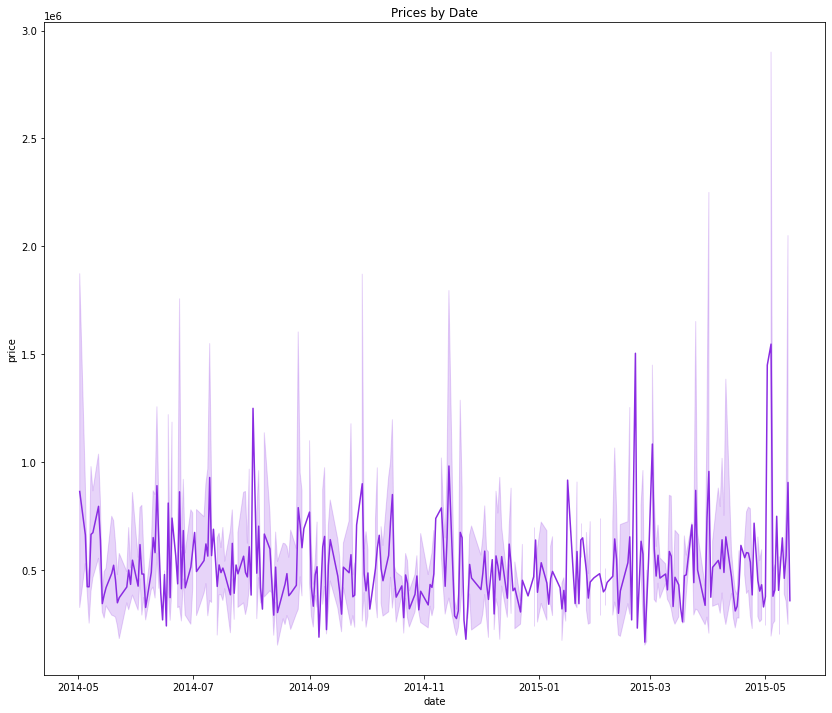

In [80]:
plt.figure(figsize=(14,12))
plt.title("Prices by Date")
sns.lineplot(data=data, x="date", y="price",color='blueviolet',)

plt.figure(figsize=(20,12))
plt.title("Prices by Date for each Grade")
sns.lineplot(data=data, x="date",y="price",hue="grade",palette="mako")

### Lower grades got higher prices !



<h1 style='color:blue;'>Bar Plot </h1>

<AxesSubplot:title={'center':'Grades count'}, xlabel='Grade', ylabel='Count of houses'>

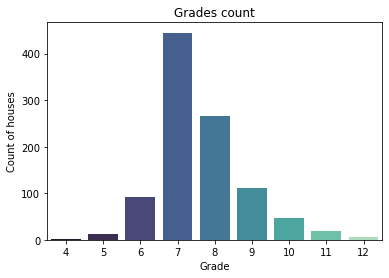

In [81]:
# we will plot how many houses in each Grade
grades = data.grade.value_counts()
plt.title("Grades count")
plt.xlabel('Grade')
plt.ylabel('Count of houses')
sns.barplot(x=grades.index , y = grades.values , palette='mako')

### Most of the houses is between 6-10 grades


<h1 style='color:blue;'>Heat Map </h1>

we create a heatmap to quickly visualize patterns in data. Each cell is color-coded according to its corresponding value.

<AxesSubplot:title={'center':'Correlation Matrix'}>

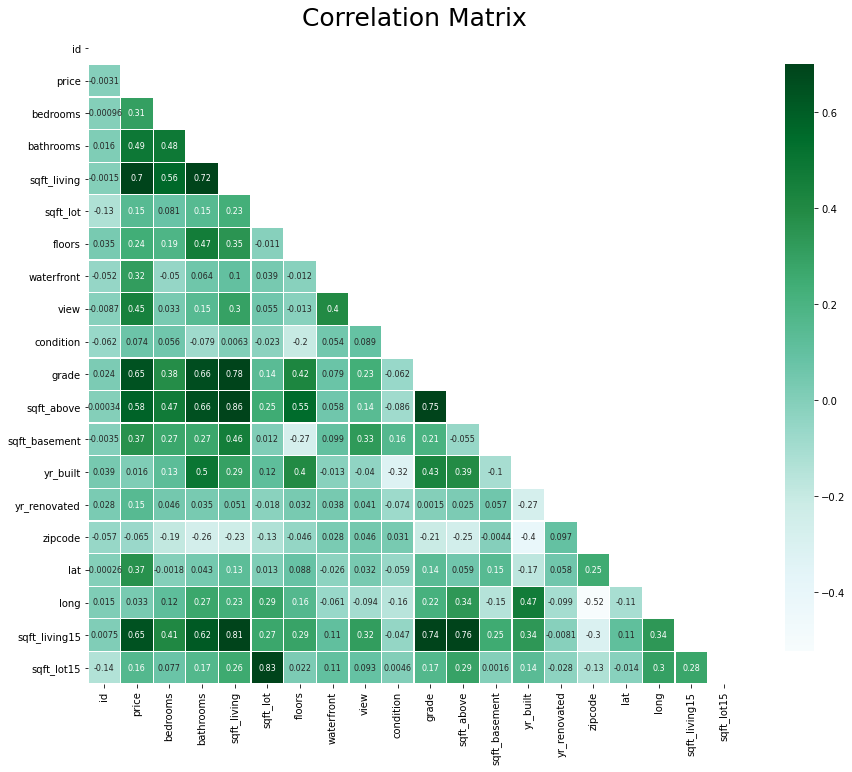

In [82]:
# triu() is an inbuilt function that is used to return a copy of the array matrix 
#         with an element of the upper part of the triangle with respect to k
# so we create a m mask for the data
m = np.triu(data.corr())
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(data.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", mask=m,
            linecolor='w',annot=True,annot_kws={"size":8},cbar_kws={"shrink": .9})

 <h1 style='color:blue;'>Scatter plot </h1>


Text(0.5, 1.0, "Relation between the built year and it's price")

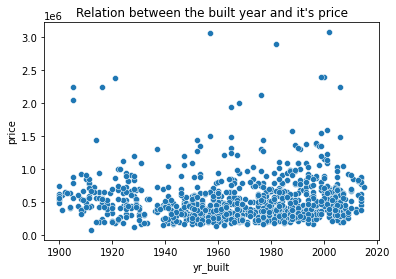

In [83]:
sns.scatterplot(x=data.yr_built , y=data.price)
plt.title("Relation between the built year and it's price")

 <h1 style='color:blue;'>
Scatter plot with regression line</h1>

We use scatter plots to highlight the relationship between two continuous variables

Text(0.5, 1.0, "Relation between the built year and it's price")

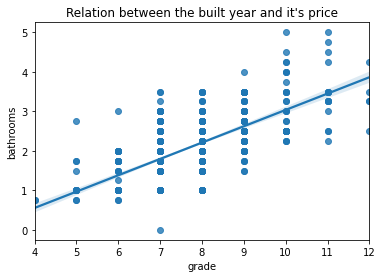

In [84]:
sns.regplot(x=data.grade , y=data.bathrooms)
plt.title("Relation between the built year and it's price")

Text(0.5, 1.0, "Relation between the built year and it's price")

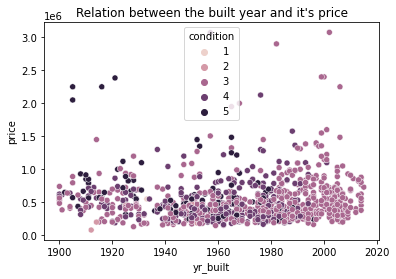

In [85]:
sns.scatterplot(x=data.yr_built , y=data.price,hue=data.condition)
plt.title("Relation between the built year and it's price")

Text(0.5, 1.0, "Relation between the built year and it's price")

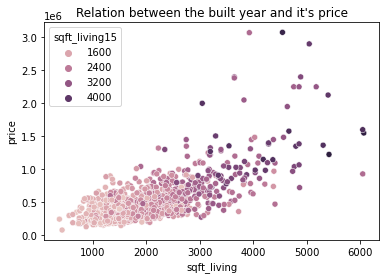

In [86]:
sns.scatterplot(x=data.sqft_living , y=data.price,hue=data.sqft_living15)
plt.title("Relation between the built year and it's price")

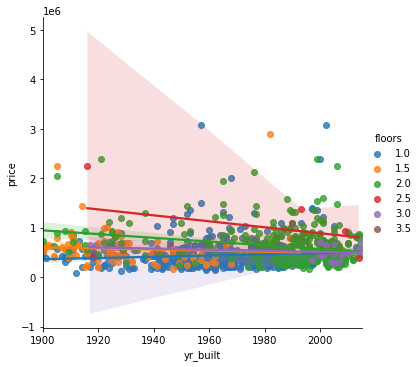

In [87]:
sns.lmplot(x="yr_built", y="price", hue="floors", data=data)
# dominatiing grades 1 , 2 

# we can adapt the design of the scatter plot to feature a categorical variable using categorical scatter plot


In [88]:
data.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4], dtype=int64)

## Let's map grade to<h1 style='color:blue;'>Categorical value </h1>
1. low : for grades below or equal to 6 
2. high : for grades above 6

In [89]:
for i in range(data.grade.shape[0]):
    if (data['grade'][i] < 7):     
        data['grade'][i] = 'low' 
    else :
        data['grade'][i] = 'high'
        
data.grade

<ipython-input-89-061618a551ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade'][i] = 'high'
D:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-89-061618a551ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade'][i] = 'low'


0      high
1      high
2       low
3      high
4      high
       ... 
995    high
996     low
997    high
998    high
999    high
Name: grade, Length: 1000, dtype: object

D:\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='grade', ylabel='price'>

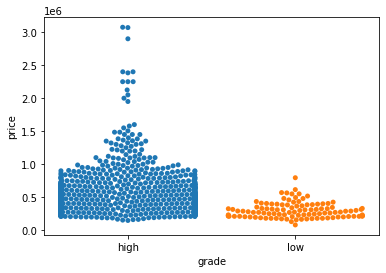

In [90]:
sns.swarmplot(x=data['grade'],
              y=data['price'])

## People buy higher grades more,many are cheap 

Let's see the prices variation with   <h1 style='color:blue;'> Histograms </h1>

<AxesSubplot:xlabel='price', ylabel='Count'>

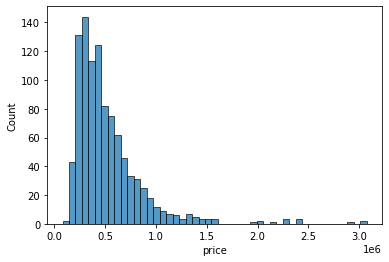

In [92]:
sns.histplot(data.price)

## Histogram data is left skewed  which means that smaller values have high frequency 

 <h1 style='color:blue;'>Density plot</h1> <span>(smoothed histogram)</span>   for kernel density estimate (KDE) 

<AxesSubplot:xlabel='price', ylabel='Density'>

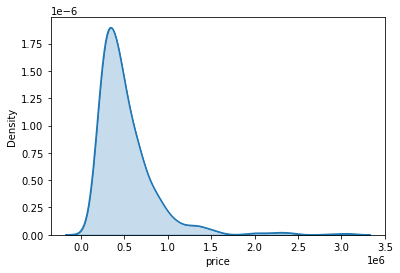

In [99]:
sns.kdeplot(data=data.price, shade=True)
sns.kdeplot(data=data.price)

We're not restricted to a single column when creating a KDE plot. We can create a two-dimensional (2D) KDE plot with the sns.jointplot command.

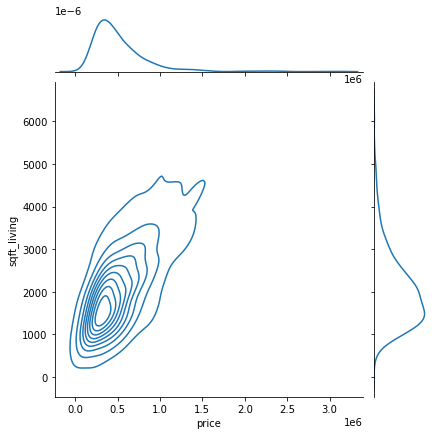

In [101]:
sns.jointplot(x=data.price, y=data.sqft_living, kind="kde")

# Colored plots 

<AxesSubplot:xlabel='price', ylabel='Count'>

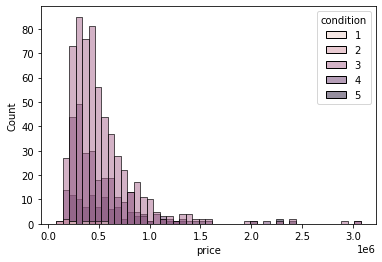

In [103]:
sns.histplot(data=data, x='price', hue='condition') # most common condition (2,3,4)

<AxesSubplot:xlabel='price', ylabel='Density'>

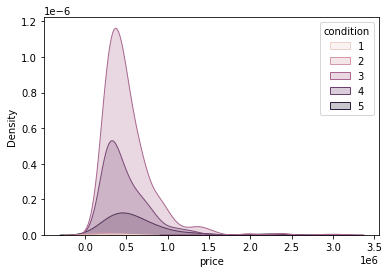

In [105]:
sns.kdeplot(data=data, x='price', hue='condition', shade=True) # So clear that the dominant condition is 2